In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

In [2]:
# Generating synthetic dataset
# y = m_k*X_k + b_k + noise -> for simplicity generating sythetic dataset for just 1 variable, m = 2, b = 3

samples = 5000
b = 3
m = 2
X = np.random.rand(samples)
noise = np.random.normal(loc=0, scale=1, size=samples)
Y = (m*X) + 3 + noise
Y

array([3.15210595, 2.51112425, 4.05176714, ..., 3.50242512, 6.04669529,
       6.03644037], shape=(5000,))

In [3]:
# Batch Gradient descent

epochs = 1000
lr = 0.01
tol = 0.00001

m = random.random() # choosing a random slope(m) between 0 and 1
b = random.random() # choosing a random intercept(b) between 0 and 1

# lists to keep track of variables during grad descent
mse_arr = []
m_arr = []
b_arr = []

for i in range(epochs):
    
    #calculate y_hat
    y_hat = (m * X) + b
    
    #calculate the MSE
    mse = np.sum(np.pow((y_hat - Y), 2))/(Y.shape[0])

    
    #calculate partial derivates wrt m and b
    partial_der_m = (-2 * np.sum(X * (Y - y_hat))) / (Y.shape[0])
    partial_der_b = (-2 * np.sum(Y - y_hat)) / (Y.shape[0])
    
    # update coefficeints m and b
    m = m - (lr * partial_der_m)
    b = b - (lr * partial_der_b)

    m_arr.append(m)
    b_arr.append(b)
    mse_arr.append(mse)
    
    # implement early-stopping(if the gradient descent has converged)
    if i>0 and abs(mse - mse_arr[i-1]) <= tol:
        print(f"Gradient descent converged at {i}")
        break



Gradient descent converged at 231


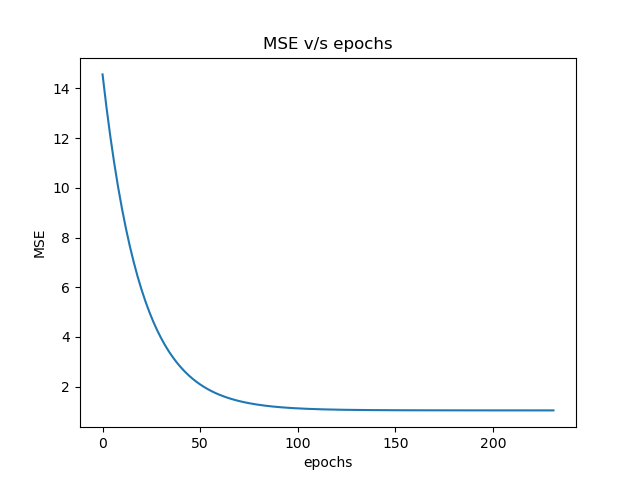

In [4]:
# plot the MSE v/s epochs
plt.plot(mse_arr)
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.title("MSE v/s epochs")
plt.show()

In [5]:
# plotting the surface plot of the loss curve

#create the gridspace for m and b
surf_m = np.linspace(0, 5, 100)
surf_b = np.linspace(0, 5, 100)

M_new, B_new  = np.meshgrid(surf_m, surf_b)

In [6]:
# calcualte MSE[i,j] for each M[i,j] and B[i,j] on X
MSE_grid = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        y_hat_new = M_new[i,j] * X  + B_new[i,j]
        MSE_grid[i,j] = np.mean((Y-y_hat_new)**2)
MSE_grid

array([[17.14594213, 16.93114677, 16.71803855, ...,  4.16610947,
         4.11496655,  4.06551077],
       [16.74695444, 16.53469368, 16.32412005, ...,  4.01297783,
         3.96436951,  3.91744833],
       [16.35306827, 16.14334211, 15.93530308, ...,  3.86494771,
         3.81887399,  3.77448741],
       ...,
       [ 2.19681467,  2.22787537,  2.2606232 , ..., 13.06501897,
        13.2597321 , 13.45613237],
       [ 2.29267445,  2.32626974,  2.36155217, ..., 13.40673479,
        13.60398253, 13.8029174 ],
       [ 2.39363575,  2.42976564,  2.46758266, ..., 13.75355214,
        13.95333447, 14.15480394]], shape=(100, 100))

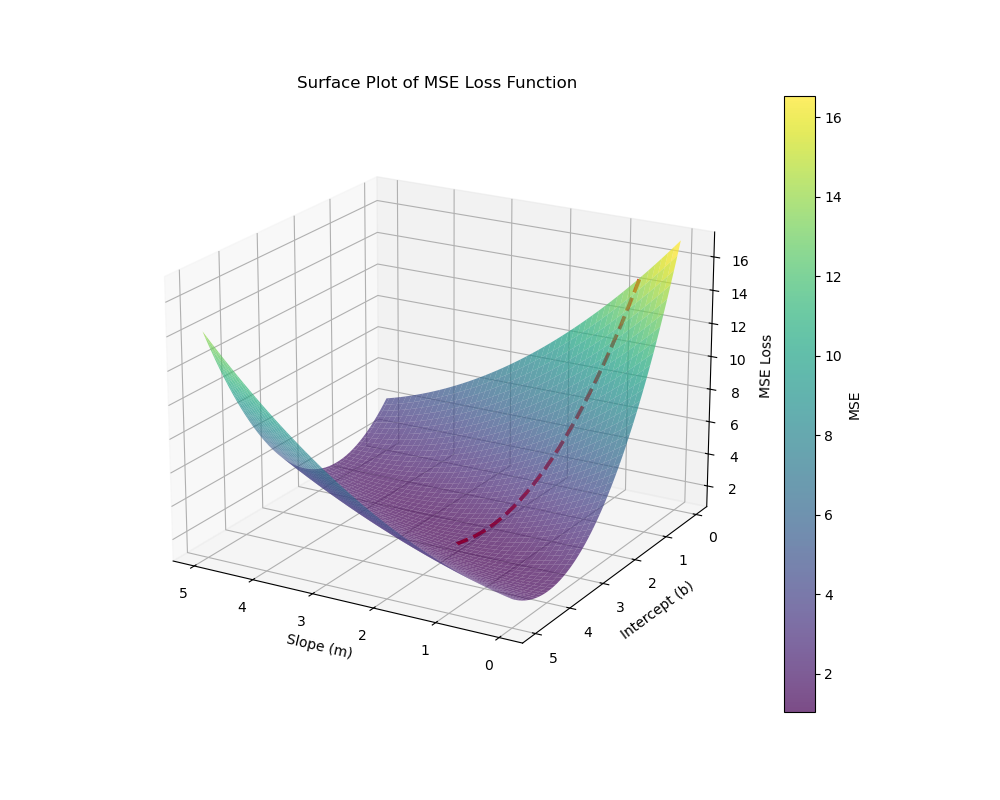

In [7]:
#plot the 3d surface plot of MSE grid and MSE's over epochs
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(M_new, B_new, MSE_grid, cmap='viridis', alpha=0.7)
ax.set_xlabel('Slope (m)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('MSE Loss')
ax.set_title('Surface Plot of MSE Loss Function')
ax.plot(m_arr, b_arr, mse_arr, color="red", linewidth=2.7, linestyle='--')
ax.view_init(elev=20, azim=120)
fig.colorbar(surf, ax=ax, label='MSE')
plt.show()

In [8]:
#convert to np array for better operations
m_history = np.array(m_arr)
b_history = np.array(b_arr)
mse_history = np.array(mse_arr)

# difference between each consecutive values - this woould provide the direction for each quiver
dm = np.diff(m_history)  
db = np.diff(b_history)  
dmse = np.diff(mse_history)  

In [16]:
def update(frame, ax, m_history, b_history, mse_history, dm, db, dmse):
    ax.clear()  # Clear previous quivers
    ax.plot_surface(M_new, B_new, MSE_grid, cmap='viridis', alpha=0.8)  # Redraw surface
    ax.set_xlabel('Slope (m)')
    ax.set_ylabel('Intercept (b)')
    ax.set_zlabel('MSE Loss')
    ax.set_title('Gradient Descent on MSE Loss Surface')
    ax.view_init(elev=20, azim=120)
    
    ax.plot(m_history[:frame+1], b_history[:frame+1], mse_history[:frame+1], 
            'r--', linewidth=2, label='Gradient Descent Path')

    if frame < len(dm):  # Show quiver for frames 0 to epochs-1
        ax.quiver(
            m_history[frame], b_history[frame], mse_history[frame],  # Start point
            dm[frame], db[frame], dmse[frame],  # Direction
            color='red', length=1.0, normalize=True
        )
    ax.legend()
    return ax,

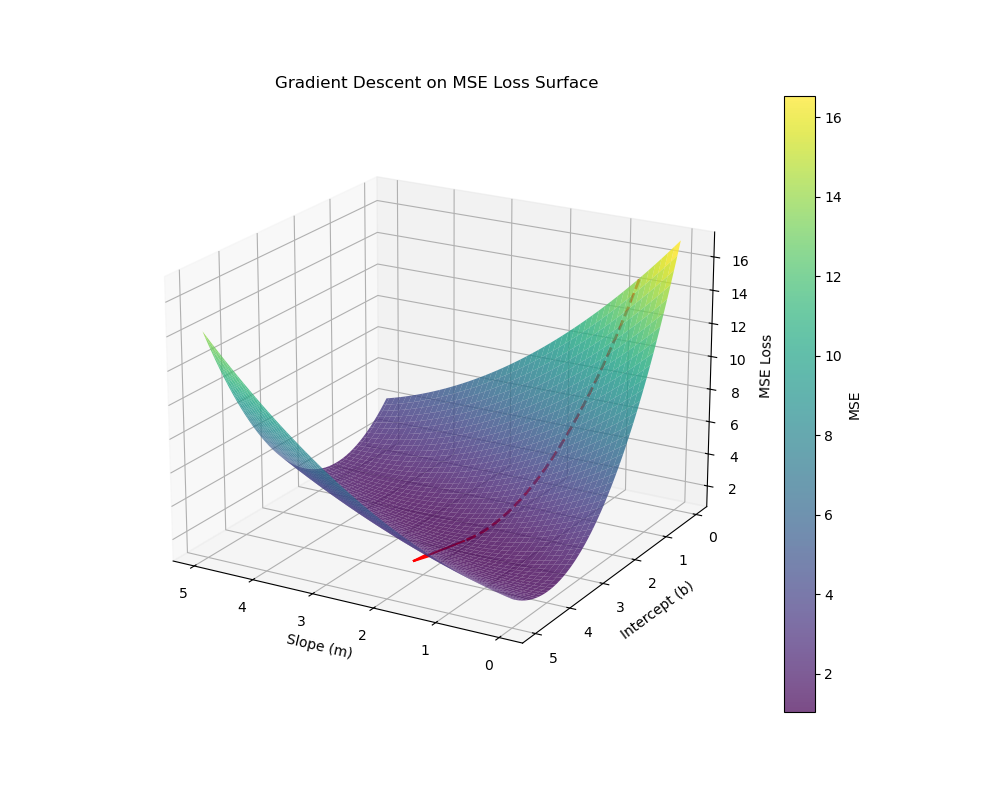

In [17]:
anim = FuncAnimation(
    fig, update, frames=range(epochs + 1), 
    fargs=(ax, m_history, b_history, mse_history, dm, db, dmse),
    interval=100, blit=False
)
plt.show()

In [ ]:
# anim.save('nano/assets/my_animation.gif', writer='ffmpeg', fps=10)